### <a name='0'></a>Import biblioteki

In [1]:
import numpy as np
import pandas as pd

np.__version__

'2.0.2'

### <a name='1'></a> Ćwiczenie 231
Zaimportuj bibliotekę _tensorflow_ w wersji 2.x.

In [16]:
import tensorflow as tf
print(tf.__version__)


2.19.0


Załaduj dane Fashion MNIST wykorzystując bibliotekę _tensorflow_. Odpowiednio zbiór treningowy (_X\_train_, _y\_train_) oraz testowy (_X\_test_, _y\_test_).

In [11]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Sprawdź rozmiar zbiorów treningowych i testowych.

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### <a name='2'></a> Ćwiczenie 232
Wykorzytując bibliotekę _matplotlib_ wyświetl obraz ze zbioru treningowego z indeksem 40.

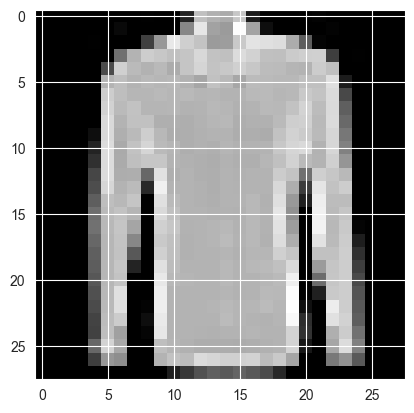

In [13]:
import matplotlib.pyplot as plt

plt.imshow(X_train[40], cmap='gray')

Wyświetl numer klasy dla próbki ze zbioru treningowego z ineksem 40.

In [14]:
print(y_train[40])

np.uint8(6)

### <a name='3'></a> Ćwiczenie 233
Wystandaryzuj dane. Podziel wartości tablic _X\_train_ oraz _X\_test_ przez wartość 255.0.

In [15]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### <a name='4'></a> Ćwiczenie 234
Zaimportuj klasę _Sequential_ z biblioteki _tensorflow_ wykorzystując pakiet _keras_.

In [17]:
from tensorflow.keras.models import Sequential



Zaimportuj warstwy _Flatten_ oraz _Dense_ z biblioteki _tensorflow_ wykorzystując pakiet _keras_.

In [18]:
from tensorflow.keras.layers import Dense, Flatten

### <a name='5'></a> Ćwiczenie 235
Zbuduj model klasy _Sequential_.

In [19]:
model = Sequential()

Dodaj pierwszą warstwę typu _Flatten_ wraz z odpowiednio dobranym parametrem _input_shape_.

In [20]:
model.add(Flatten(input_shape=(28,28)))

/Users/bartekochnik/Desktop/Studia/Semestr 3/Języki skryptowe/KOLOKWIUM/Ochnik_2/4/.venv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


mDodaj kolejną warstwę typu _Dense_ z 128 neuronami i funkcją aktywacji _relu_.

In [21]:
model.add(Dense(units=128,activation = 'relu'))

Dodaj ostatnią warstwę typu _Dense_ z 10 neuronami i funkcją aktywacji _softmax_.

In [22]:
model.add(Dense(units=10,activation = 'softmax'))

Wyświetl podsumowanie modelu.

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

### <a name='6'></a> Ćwiczenie 236
Skompiluj model. Wykorzystaj optymalizator _rmsprop_, funkcję straty _sparse_categorical_crossentropy_ oraz metrykę _accuracy_.

In [26]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### <a name='7'></a> Ćwiczenie 237
Dopasuj model do danych treningowych, ustawiając 10 epok oraz podział na zbiór walidacyjny wynoszący 0.2.

In [27]:
history = model.fit(X_train, y_train, epochs=10, validation_split=(0.2))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7639 - loss: 0.6708 - val_accuracy: 0.8418 - val_loss: 0.4499
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8567 - loss: 0.3935 - val_accuracy: 0.8618 - val_loss: 0.3986
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8717 - loss: 0.3524 - val_accuracy: 0.8742 - val_loss: 0.3593
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8814 - loss: 0.3316 - val_accuracy: 0.8798 - val_loss: 0.3394
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8897 - loss: 0.3076 - val_accuracy: 0.8808 - val_loss: 0.3442
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8922 - loss: 0.2941 - val_accuracy: 0.8805 - val_loss: 0.3456
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8953 - loss: 0.2941 - val_accuracy: 0.8856 - val_loss: 0.3629
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9012 - loss: 0.2847 - 

### <a name='8'></a> Ćwiczenie 238
Dokonaj predykcji modelu na podstawie danych testowych.

In [34]:
y_probs = model.predict(X_test)
y_pred = np.argmax(y_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step


Zbuduj macierz konfuzji (macierz pomyłek).

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[777   0   6  38   4   0 166   0   9   0]
 [  4 971   0  21   1   0   2   0   1   0]
 [ 17   1 716  12 116   0 133   0   5   0]
 [ 10   9  10 898  35   0  35   0   3   0]
 [  0   1  76  32 770   0 118   0   3   0]
 [  0   0   0   1   0 965   0  22   1  11]
 [100   2  54  25  45   0 761   0  13   0]
 [  0   0   0   0   0  17   0 969   0  14]
 [  3   0   1   7   3   2   8   4 972   0]
 [  0   0   0   0   0   6   1  53   0 940]]


### <a name='9'></a> Ćwiczenie 239
Zbuduj obiekt pandas _DataFrame_ zawierający predykcje modelu. Nadaj nazwę kolumny _prediction_ i przypisz do zmiennej _results_.

In [39]:
results = pd.DataFrame(y_pred, columns=['Prediction'])
results

,Prediction
0,9
1,2
2,1
3,1
4,6
...,...
9995,9
9996,1
9997,8
9998,1


Przypisz nową kolumnę z wartościami ze zmiennej _y\_test_ i nazwij ją _y\_test_.

In [42]:
results['y_test'] = y_pred
results

,Prediction,y_test
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6
...,...,...
9995,9,9
9996,1,1
9997,8,8
9998,1,1


Przypisz nową kolumnę o nazwie _is_misclassified_, która zwróci 1, gdy próbki zostaną błędnie sklasyfikowane, w przeciwnym przypadku 0.

In [50]:
results['is_missclassified'] = ((results.Prediction != results.y_test).astype('int'))
results

,Prediction,y_test,is_missclassified
0,9,9,0
1,2,2,0
2,1,1,0
3,1,1,0
4,6,6,0
...,...,...,...
9995,9,9,0
9996,1,1,0
9997,8,8,0
9998,1,1,0


### <a name='10'></a> Ćwiczenie 240
Zapisz obiekt _results_ do pliku _results.csv_.

In [51]:
results.to_csv('results.csv', index=False)

In [52]:
!head results.csv

Prediction,y_test,is_missclassified
9,9,0
2,2,0
1,1,0
1,1,0
6,6,0
1,1,0
4,4,0
6,6,0
5,5,0
